# Aim:
Implementation and training of a Multilayer Perceptron (MLP) model for image classification on the Fashion MNIST dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf  
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [4]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [5]:
print(X_train.shape,
 y_train.shape,
  X_test.shape, 
  y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows * img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows * img_cols)

print(X_train.shape)
print(X_test.shape)


(60000, 784)
(10000, 784)


Class 0: T-shirt/top
Class 1: Trouser
Class 2: Pullover
Class 3: Dress
Class 4: Coat
Class 5: Sandal
Class 6: Shirt
Class 7: Sneaker
Class 8: Bag
Class 9: Ankle boot


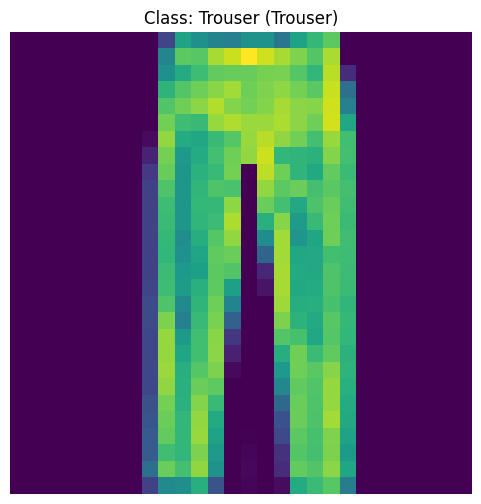

In [7]:

classes = [
    "T-shirt/top",    
    "Trouser",        
    "Pullover",       
    "Dress",       
    "Coat",           
    "Sandal",         
    "Shirt",          
    "Sneaker",        
    "Bag",            
    "Ankle boot"      
]


for i, class_name in enumerate(classes):
    print(f"Class {i}: {class_name}")

mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

trouser_index = np.where(y_train == 1)[0][0]

plt.figure(figsize=(6,6))
plt.imshow(X_train[trouser_index])
plt.title(f"Class: {classes[1]} (Trouser)")
plt.axis('off')
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape (60000, 784)
X_test_flat = X_test.reshape(X_test.shape[0], -1)      # Shape (10000, 784)

X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0

print("Flattened X_train shape:", X_train_flat.shape) 

model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(784,)))  
model.add(Dense(10, activation='softmax'))                    

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flat, y_train, epochs=50, batch_size=256, validation_split=0.2)


test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")





Flattened X_train shape: (60000, 784)
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6351 - loss: 1.2129 - val_accuracy: 0.8114 - val_loss: 0.5655
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8202 - loss: 0.5359 - val_accuracy: 0.8322 - val_loss: 0.4739
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.4556 - val_accuracy: 0.8426 - val_loss: 0.4435
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8519 - loss: 0.4240 - val_accuracy: 0.8532 - val_loss: 0.4187
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.4067 - val_accuracy: 0.8586 - val_loss: 0.3980
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8659 - loss: 0.3778 - val_accuracy: 0.8624 - val_loss: 0.3867
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8676 - loss: 0.3741 - val_accuracy: 0.8635 - val_loss: 0.3786
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


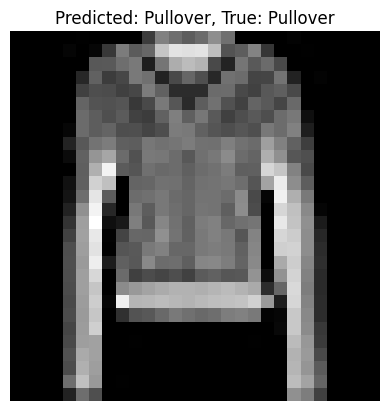

In [10]:
#test case , we chose a random image from the test set

test_index = np.random.randint(0, X_test.shape[0])  
test_image = X_test[test_index]  
test_label = y_test[test_index]  


test_image_flat = test_image.reshape(1, -1).astype('float32') / 255.0  

predicted_probabilities = model.predict(test_image_flat)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]  

plt.imshow(test_image, cmap='gray')  
plt.title(f'Predicted: {classes[predicted_class]}, True: {classes[test_label]}') 
plt.axis('off')  
plt.show()

Multilayer perceptron


In [15]:
# Reshape the data to a 2D tensor (flatten the images) for ANN
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Shape (60000, 784)
X_test_flat = X_test.reshape(X_test.shape[0], -1)      # Shape (10000, 784)

# Normalize the data to a range of 0-1
X_train_flat = X_train_flat.astype('float32') / 255.0
X_test_flat = X_test_flat.astype('float32') / 255.0

# Print the shape of the flattened data
print("Flattened X_train shape:", X_train_flat.shape)  # Should output (60000, 784)

# Create the MLP model
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(784,)))  # First hidden layer with 128 neurons
model.add(Dense(64, activation='sigmoid'))                        # Second hidden layer with 64 neurons
model.add(Dense(32, activation='sigmoid'))                        # Third hidden layer with 32 neurons
model.add(Dense(10, activation='softmax'))                        # Output layer with 10 neurons (one for each class)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_flat, y_train, epochs=50, batch_size=256, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_flat, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Flattened X_train shape: (60000, 784)
Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3544 - loss: 2.0609 - val_accuracy: 0.7172 - val_loss: 1.1435
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.9939 - val_accuracy: 0.8007 - val_loss: 0.6904
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8142 - loss: 0.6330 - val_accuracy: 0.8325 - val_loss: 0.5202
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.4880 - val_accuracy: 0.8474 - val_loss: 0.4561
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.4336 - val_accuracy: 0.8482 - val_loss: 0.4310
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.3960 - val_accuracy: 0.8606 - val_loss: 0.4034
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8708 - loss: 0.3787 - val_accuracy: 0.8664 - val_loss: 0.3836
Epoch 8/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.